# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Idha Kurniawati
- Email: idhakurniawati03@gmail.com
- Id Dicoding: idhakt

## Persiapan

### Kriteria

Tiga kriteria utama yang dalam mengerjakan proyek ini.
1. Menggunakan Templat Proyek yang Telah Disediakan
2. Menjalankan Seluruh Proses dalam Proyek Data Science
3. Membuat Minimal Satu Business Dashboard

### Background

Jaya Jaya Maju merupakan salah satu perusahaan multinasional yang telah berdiri sejak tahun 2000. Ia memiliki lebih dari 1000 karyawan yang tersebar di seluruh penjuru negeri.

Walaupun telah menjadi perusahaan yang cukup besar, Jaya Jaya Maju masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Untuk mencegah hal ini semakin parah, manajer departemen HR ingin meminta bantuan Anda mengidentifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut. Selain itu, ia juga meminta Anda untuk membuat business dashboard untuk membantunya memonitori berbagai faktor tersebut. Selain itu, mereka juga telah menyediakan dataset yang dapat Anda unduh melalui tautan berikut: [Jaya Jaya Maju](https://github.com/dicodingacademy/dicoding_dataset/tree/main/employee).

### Business Understanding

#### Problem Statement

Berikut adalah poin-poin masalah yang dihadapi oleh perusahaan Jaya Jaya Maju:

1. Tingginya tingkat *attrition rate* karyawan yang melebihi 10%.
2. Kurangnya identifikasi faktor penyebab Attrition.
3. Tidak adanya sistem prediksi Attrition.
4. Keterbatasan *monitoring* dan visualisasi data HR.

#### Goals

1. Mengidentifikasi faktor-faktor utama yang mempengaruhi tingkat Attrition karyawan.
2. Membangun model *machine learning* yang dapat memprediksi kecenderungan seorang karyawan untuk meninggalkan perusahaan.
3. Membuat *dashboard monitoring* untuk membantu departemen HR dalam memantau faktor-faktor yang mempengaruhi Attrition.

#### Solution Approach

Untuk mencapai goals yang telah ditetapkan, berikut adalah solusi yang akan diimplementasikan:

1. Menganalisis dan memvisualisasikan data untuk memahami hubungan antara berbagai variabel dengan tingkat attrition.
2. Membangun model prediktif untuk memprediksi kecenderungan karyawan untuk meninggalkan perusahaan.
3. Mengevaluasi performa model menggunakan metrik seperti accuracy, precision, recall, dan F1-score.
4. Menganalisis feature importance untuk mengidentifikasi faktor-faktor utama yang mempengaruhi attrition.
5. Membuat dashboard interaktif menggunakan Streamlit untuk monitoring faktor-faktor attrition.

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import time
from imblearn.over_sampling import SMOTE

### Menyiapkan data yang akan diguankan

In [2]:
url = "https://github.com/dicodingacademy/dicoding_dataset/blob/main/employee/employee_data.csv?raw=true"
df = pd.read_csv(url)
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Variabel-Variabel pada Dataset

Berikut adalah deskripsi variabel-variabel yang terdapat dalam dataset:

- **EmployeeId**: Identitas Karyawan  
- **Attrition**: Apakah karyawan mengundurkan diri? (0 = tidak, 1 = ya)  
- **Age**: Usia karyawan  
- **BusinessTravel**: Komitmen perjalanan dinas untuk pekerjaan  
- **DailyRate**: Gaji harian  
- **Department**: Departemen tempat karyawan bekerja  
- **DistanceFromHome**: Jarak dari rumah ke tempat kerja (dalam km)  
- **Education**: Tingkat pendidikan  
  - 1: Di bawah perguruan tinggi  
  - 2: Perguruan tinggi  
  - 3: Sarjana  
  - 4: Magister  
  - 5: Doktor  
- **EducationField**: Bidang pendidikan  
- **EnvironmentSatisfaction**: Kepuasan terhadap lingkungan kerja  
  - 1: Rendah  
  - 2: Sedang  
  - 3: Tinggi  
  - 4: Sangat Tinggi  
- **Gender**: Jenis kelamin karyawan  
- **HourlyRate**: Gaji per jam  
- **JobInvolvement**: Tingkat keterlibatan kerja  
  - 1: Rendah  
  - 2: Sedang  
  - 3: Tinggi  
  - 4: Sangat Tinggi  
- **JobLevel**: Tingkat jabatan (1 hingga 5)  
- **JobRole**: Peran/jabatan karyawan  
- **JobSatisfaction**: Kepuasan kerja  
  - 1: Rendah  
  - 2: Sedang  
  - 3: Tinggi  
  - 4: Sangat Tinggi  
- **MaritalStatus**: Status pernikahan  
- **MonthlyIncome**: Gaji bulanan  
- **MonthlyRate**: Tarif bulanan  
- **NumCompaniesWorked**: Jumlah perusahaan tempat karyawan pernah bekerja  
- **Over18**: Apakah usia karyawan di atas 18 tahun?  
- **OverTime**: Apakah bekerja lembur?  
- **PercentSalaryHike**: Persentase kenaikan gaji tahun lalu  
- **PerformanceRating**: Penilaian kinerja  
  - 1: Rendah  
  - 2: Baik  
  - 3: Sangat Baik  
  - 4: Luar Biasa  
- **RelationshipSatisfaction**: Kepuasan hubungan kerja  
  - 1: Rendah  
  - 2: Sedang  
  - 3: Tinggi  
  - 4: Sangat Tinggi  
- **StandardHours**: Jam kerja standar  
- **StockOptionLevel**: Tingkat opsi saham  
- **TotalWorkingYears**: Total tahun pengalaman kerja  
- **TrainingTimesLastYear**: Jumlah pelatihan yang diikuti tahun lalu  
- **WorkLifeBalance**: Keseimbangan kerja dan kehidupan pribadi  
  - 1: Rendah  
  - 2: Baik  
  - 3: Sangat Baik  
  - 4: Luar Biasa  
- **YearsAtCompany**: Jumlah tahun bekerja di perusahaan  
- **YearsInCurrentRole**: Jumlah tahun dalam peran saat ini  
- **YearsSinceLastPromotion**: Jumlah tahun sejak promosi terakhir  
- **YearsWithCurrManager**: Jumlah tahun bersama manajer saat ini


In [3]:
# Menampilkan informasi dataset
print("\nDataset Info :")
print(35*"=")
print(f"Jumlah baris dan kolom: {df.shape}")
print("\nInformasi dataset:")
print(df.info())


Dataset Info :
Jumlah baris dan kolom: (1470, 35)

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64

Berikut penjelasan informasi mengenai dataset di atas:

- Terdapat total 1470 data karyawan yang masing-masing memiliki 35 atribut atau fitur.
- Terdapat 26 kolom bertipe numerik (int64),yaitu `EmployeeId`, `Age`, `DailyRate`, `DistanceFromHome`, `Education`, `EmployeeCount`, `EnvironmentSatisfaction`, `HourlyRate`, `JobInvolvement`, `JobLevel`, `JobSatisfaction`, `MonthlyIncome`, `MonthlyRate`, `NumCompaniesWorked`, `PercentSalaryHike`, `PerformanceRating`, `RelationshipSatisfaction`, `StandardHours`, `StockOptionLevel`, `TotalWorkingYears`, `TrainingTimesLastYear`, `WorkLifeBalance`, `YearsAtCompany`, `YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager`.

- Terdapat 8 kolom bertipe kategori (object), yaitu `BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole`, `MaritalStatus`, `Over18`, dan `OverTime`.

- Terdapat 1 kolom bertipe desimal (float64), yaitu kolom `Attrition`.

- Kolom `Attrition` hanya memiliki 1058 entri.



In [4]:
df.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [5]:
# cek data unik
df.nunique()

,0
EmployeeId,1470
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


In [6]:
# Cek distribusi nilai pada kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].nunique() <= 10:  # Mengecualikan kolom dengan lebih dari 10 nilai unik
        print(f"\nDistribusi nilai pada kolom '{col}':\n")
        print(df[col].value_counts())
        print(50*"=")

# Cek distribusi nilai pada kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() <= 10:  # Mengecualikan kolom dengan lebih dari 10 kategori
        print(f"\nDistribusi nilai pada kolom '{col}':\n")
        print(df[col].value_counts())
        print(50*"=")


Distribusi nilai pada kolom 'Attrition':

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Distribusi nilai pada kolom 'Education':

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

Distribusi nilai pada kolom 'EmployeeCount':

EmployeeCount
1    1470
Name: count, dtype: int64

Distribusi nilai pada kolom 'EnvironmentSatisfaction':

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

Distribusi nilai pada kolom 'JobInvolvement':

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

Distribusi nilai pada kolom 'JobLevel':

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

Distribusi nilai pada kolom 'JobSatisfaction':

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

Distribusi nilai pada kolom 'NumCompaniesWorked':

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49


Terdapat kolom yang hanya memiliki satu nilai saja, yaitu kolom `EmployeeCount`, `StandardHours`, dan `Over18` daripada menghasilkan redundan dan mungkin tidak berkontribusi banyak terhadap analisis dan bisa dipertimbangkan untuk dihapus.

In [7]:
# Cek duplikat
print("\nJumlah duplikat:\n")
print(df.duplicated().sum())


Jumlah duplikat:

0


In [8]:
# Cek missing values
print("\nJumlah missing values per kolom:\n")
print(df.isnull().sum())


Jumlah missing values per kolom:

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkL

Semua kolom kecuali `Attrition` memiliki nilai yang lengkap (tidak ada missing values). Kolom `Attrition` memiliki *missing values* sebanyak 412 baris.

## Data Preparation

### Menangani Missing Values (Data Hilang)

In [9]:
# Menghapus baris yang memiliki nilai kosong (NaN) pada kolom 'Attrition'
df = df.dropna(subset=['Attrition'])

### Menghapus Kolom yang Kurang Relevan

In [10]:
# Menghapus kolom yang tidak memberikan informasi bervariasi atau dianggap tidak relevan untuk analisis
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'])

### Univariate Analysis

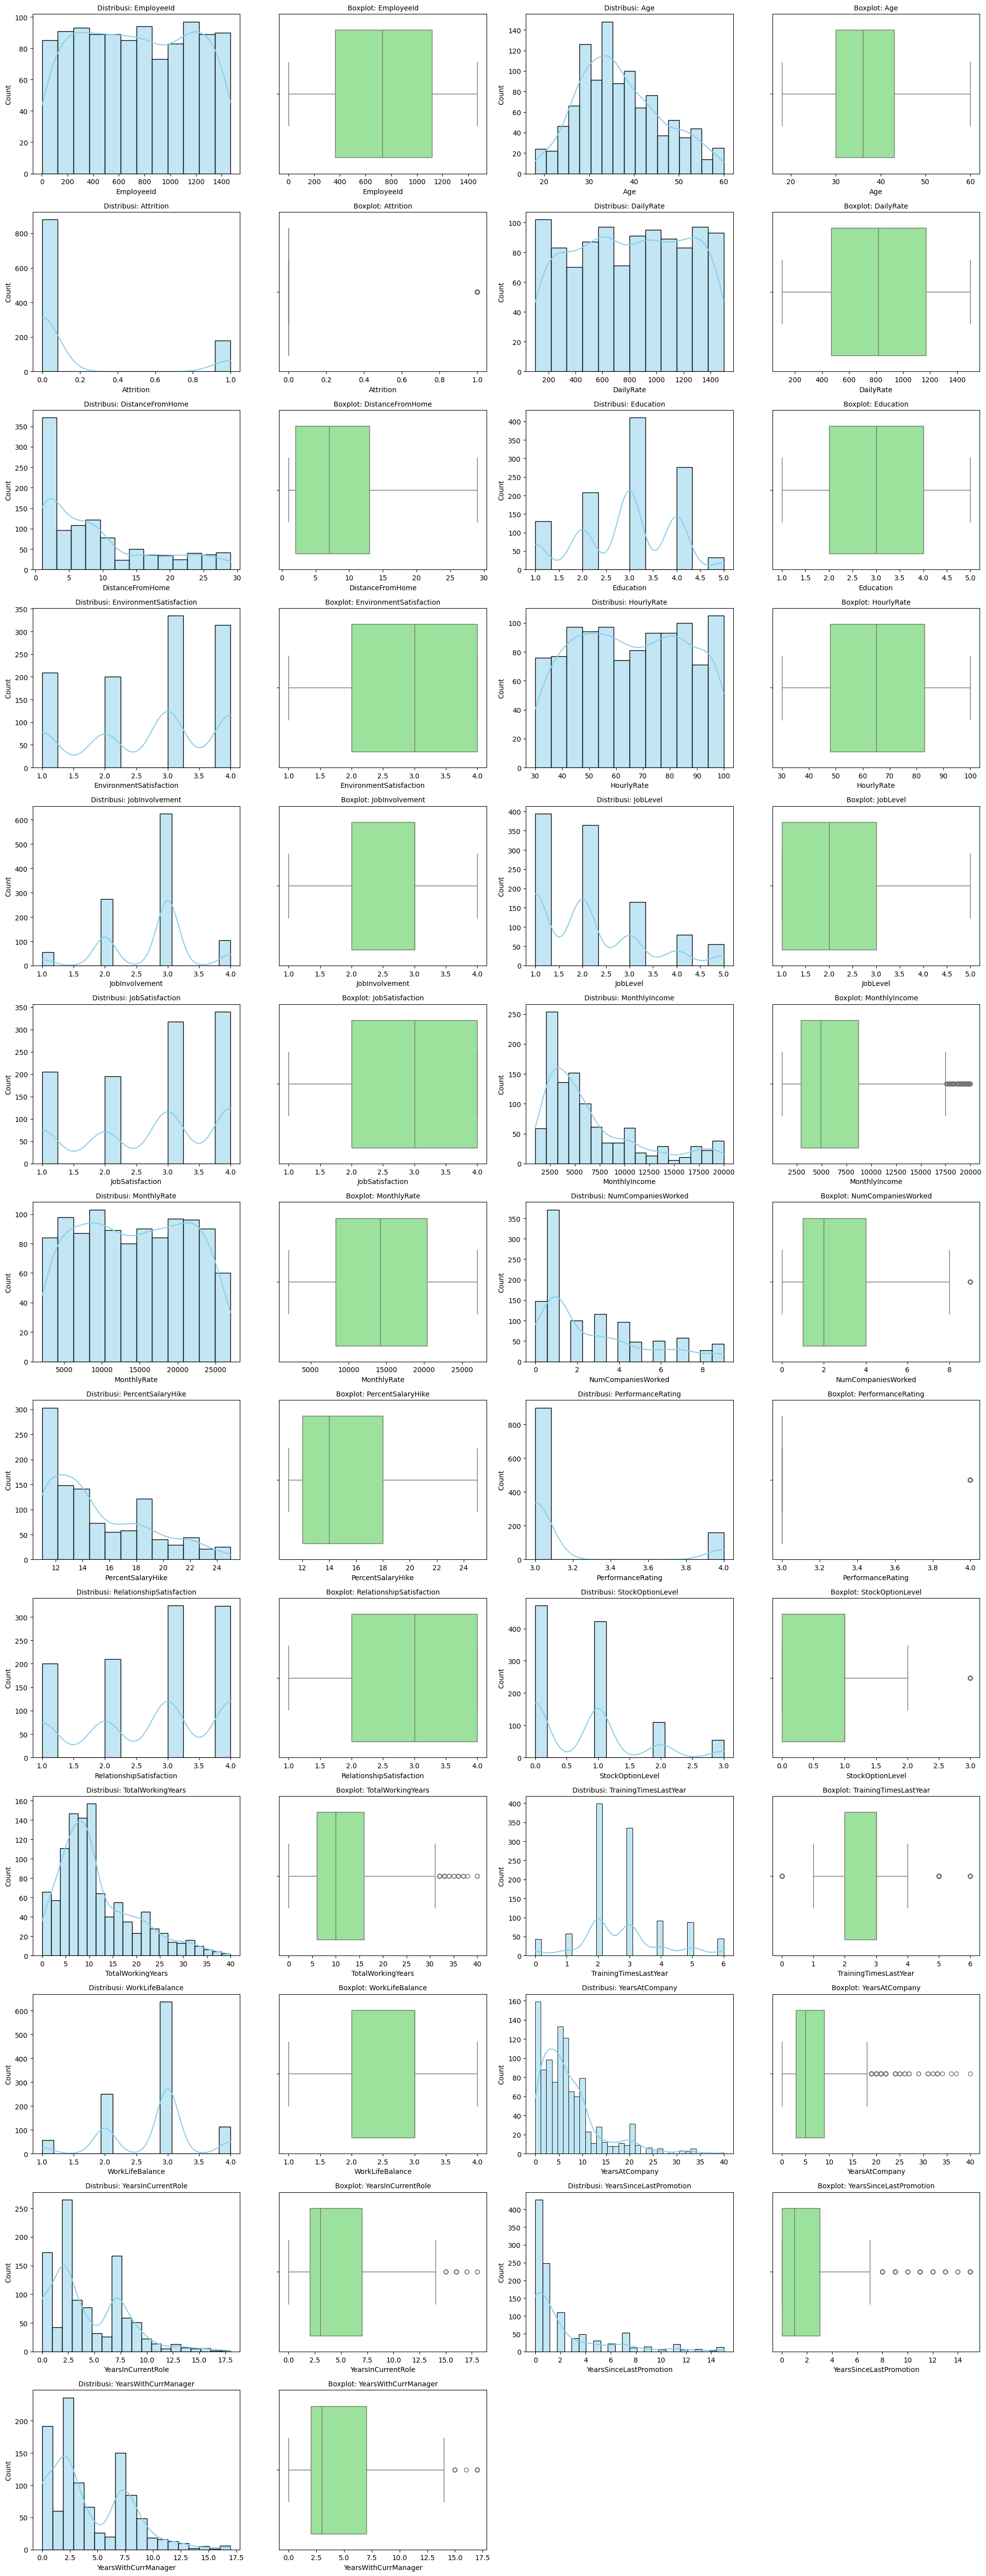

In [11]:
# Univariate Analysis untuk kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_features = len(numeric_cols)
n_cols = 2  # 2 kolom fitur per baris
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols * 2, figsize=(20, n_rows * 4))

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = (i % n_cols) * 2  # posisi histogram

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[row, col_pos], color='skyblue')
    axes[row, col_pos].set_title(f'Distribusi: {col}', fontsize=10)
    axes[row, col_pos].set_xlabel(col)

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[row, col_pos + 1], color='lightgreen')
    axes[row, col_pos + 1].set_title(f'Boxplot: {col}', fontsize=10)

# Nonaktifkan subplot kosong jika jumlah fitur ganjil
if n_features % n_cols != 0:
    total_plots = n_rows * n_cols * 2
    for i in range(n_features * 2, total_plots):
        row = i // (n_cols * 2)
        col_pos = i % (n_cols * 2)
        axes[row, col_pos].axis('off')

plt.tight_layout()
plt.show()

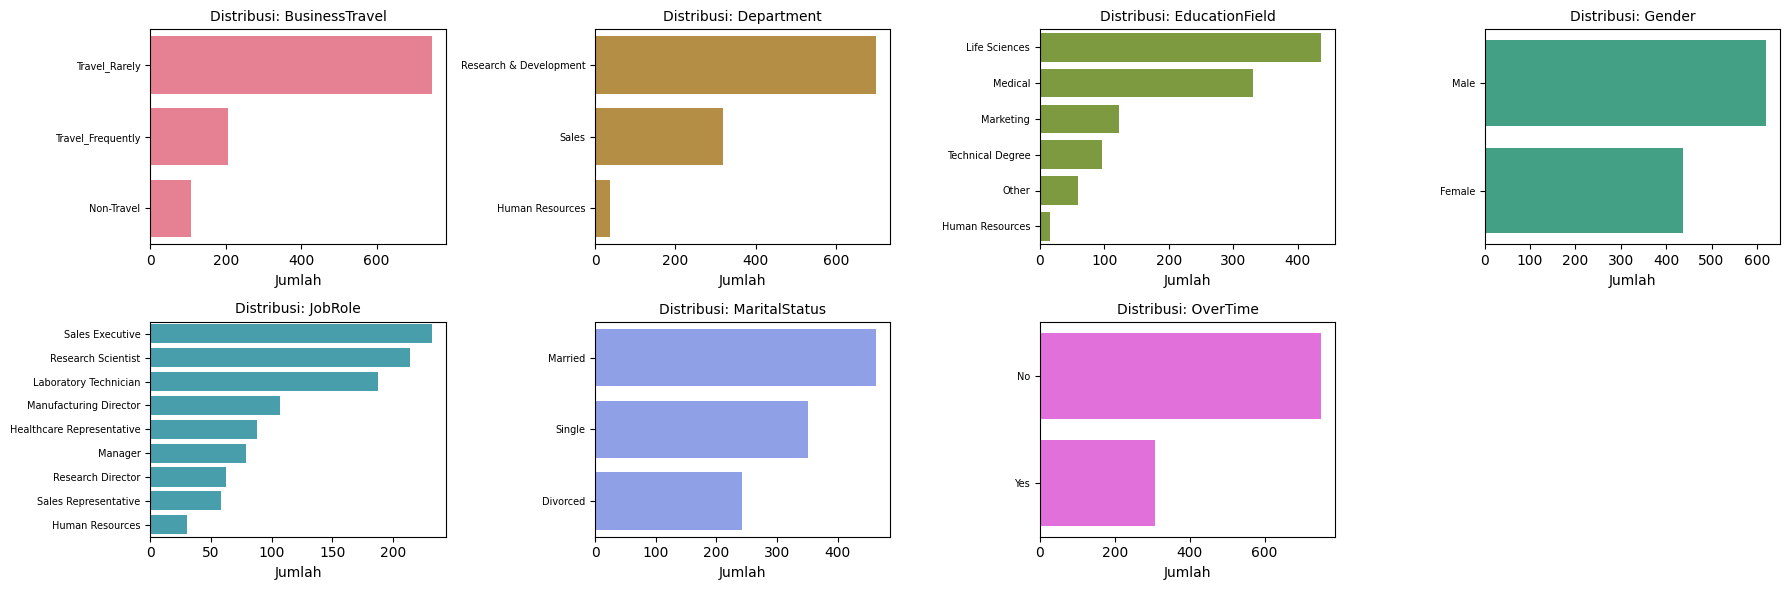

In [12]:
# Univariate Analysis untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
n_features = len(categorical_cols)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Siapkan subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 3))
axes = axes.flatten()

# Buat palette warna
palette = sns.color_palette("husl", n_features)

# Plot horizontal bar untuk tiap kolom kategorikal
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=ax, color=palette[i])
    ax.set_title(f'Distribusi: {col}', fontsize=10)
    ax.set_ylabel('')
    ax.set_xlabel('Jumlah')
    ax.tick_params(axis='y', labelsize=7)

# Sembunyikan subplot kosong jika jumlah fitur tidak pas
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Multivariate Analysis

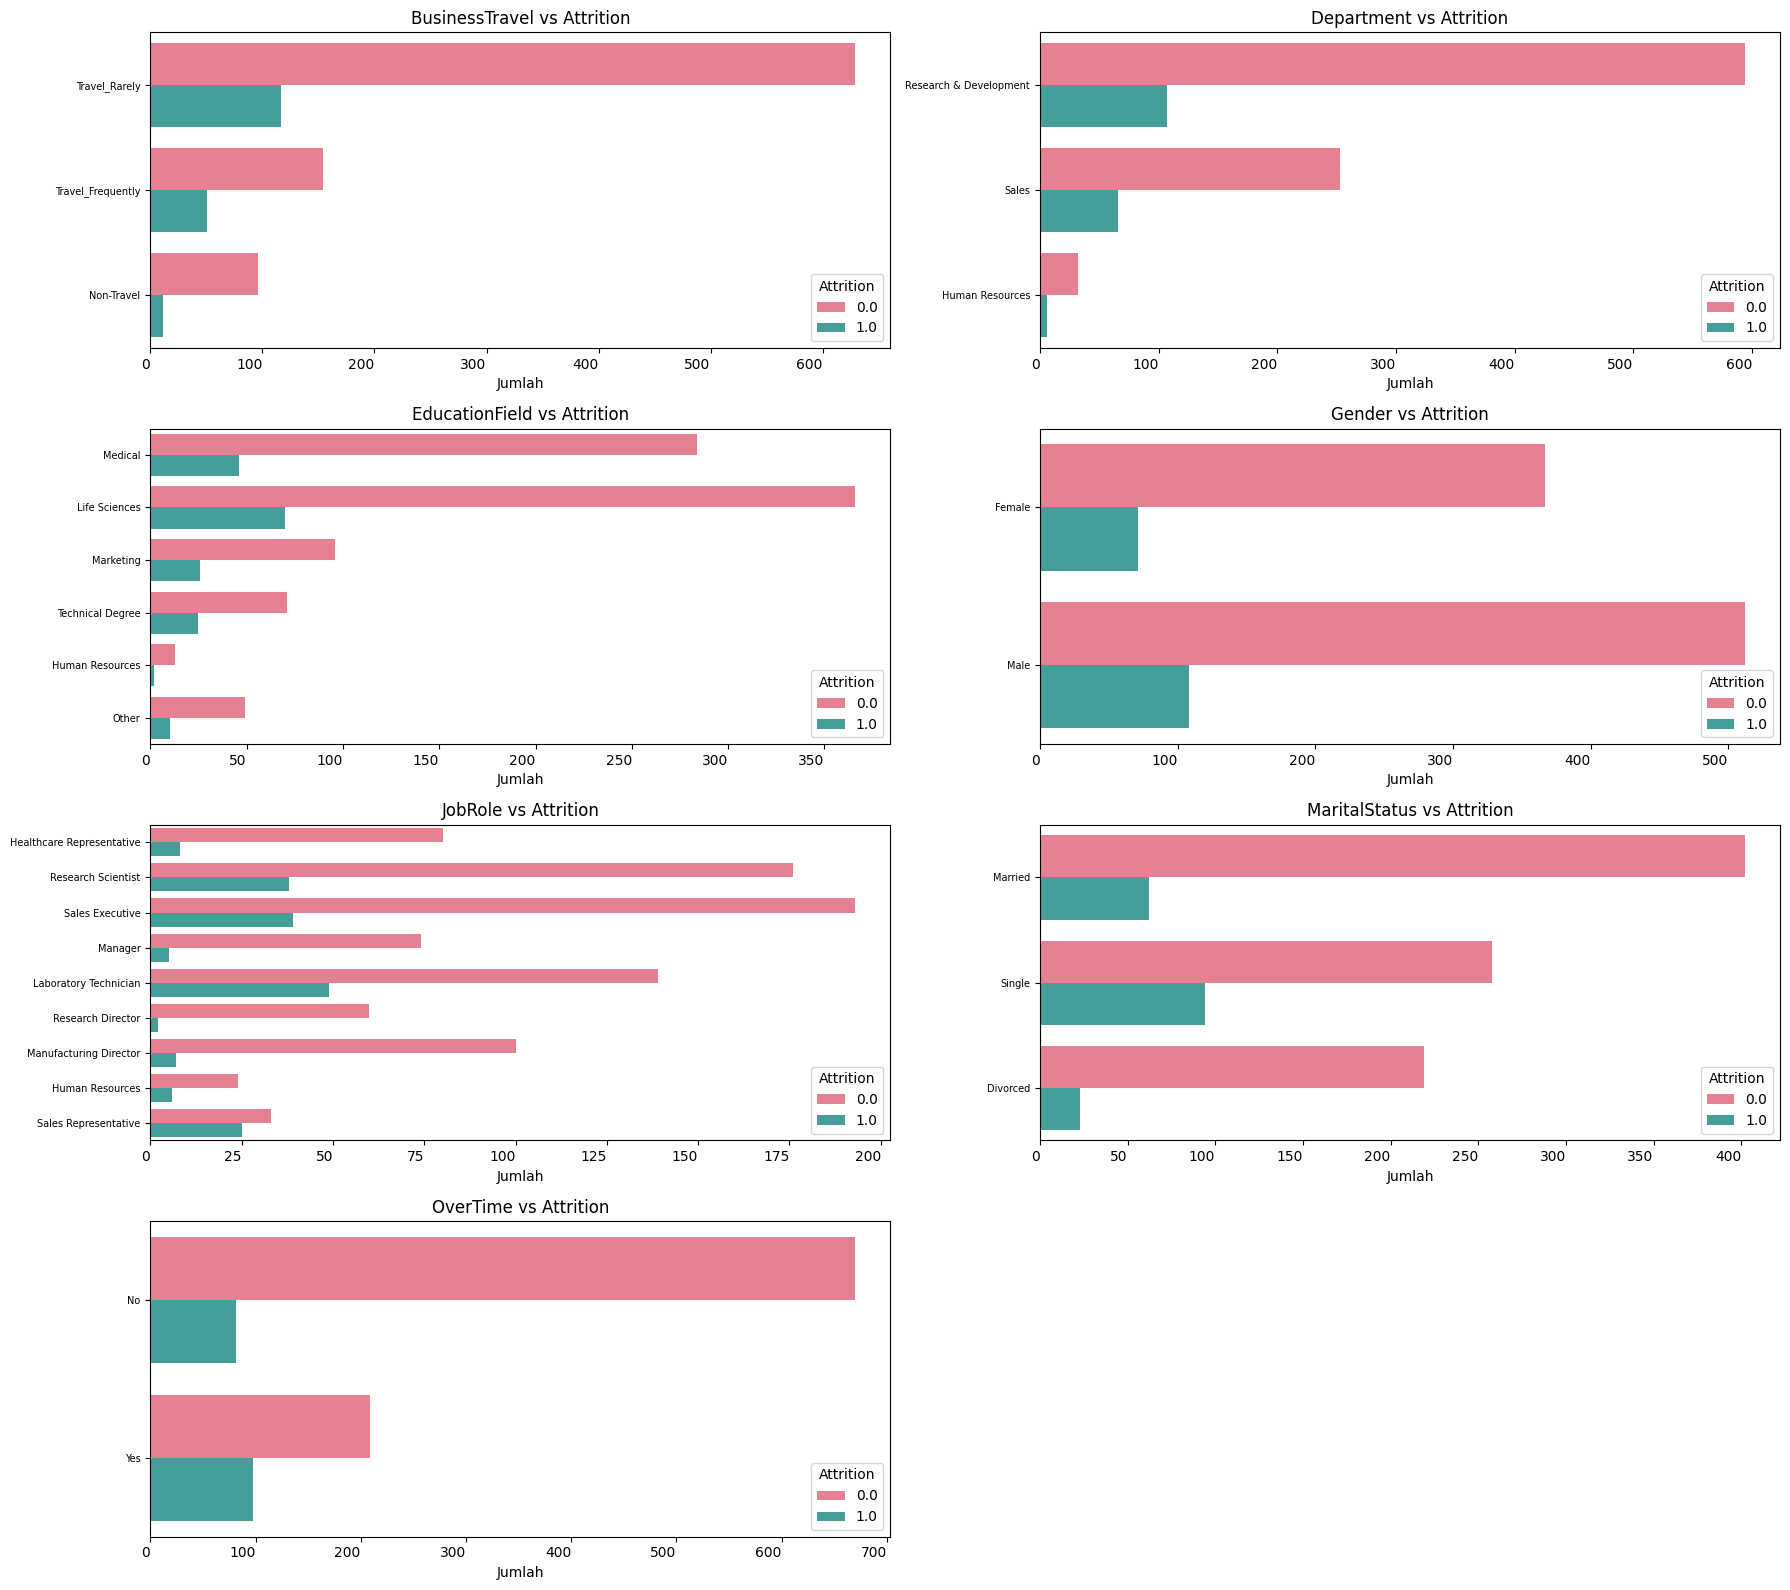

In [13]:
# Plot untuk setiap fitur kategorikal relatif terhadap 'Attrition'
categorical_cols = df.select_dtypes(include=['object']).columns

n_features = len(categorical_cols)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# figure dan axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))

# iterasi setiap fitur kategorikal
for i, col in enumerate(categorical_cols):
    row = i // n_cols
    col_pos = i % n_cols

    # axis yang akan digunakan
    ax = axes[row, col_pos] if n_rows > 1 else axes[col_pos]

    # countplot
    sns.countplot(y=col, hue='Attrition', data=df, palette='husl', ax=ax)
    ax.set_title(f'{col} vs Attrition')
    ax.set_ylabel('')
    ax.set_xlabel('Jumlah')
    ax.legend(title='Attrition', loc='lower right')
    ax.tick_params(axis='y', labelsize=7)

    # Rotasi
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    fig.tight_layout()

# Menyembunyikan axes yang tidak digunakan jika jumlah fitur tidak habis dibagi 2
if n_features % n_cols != 0:
    for j in range(n_features % n_cols, n_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

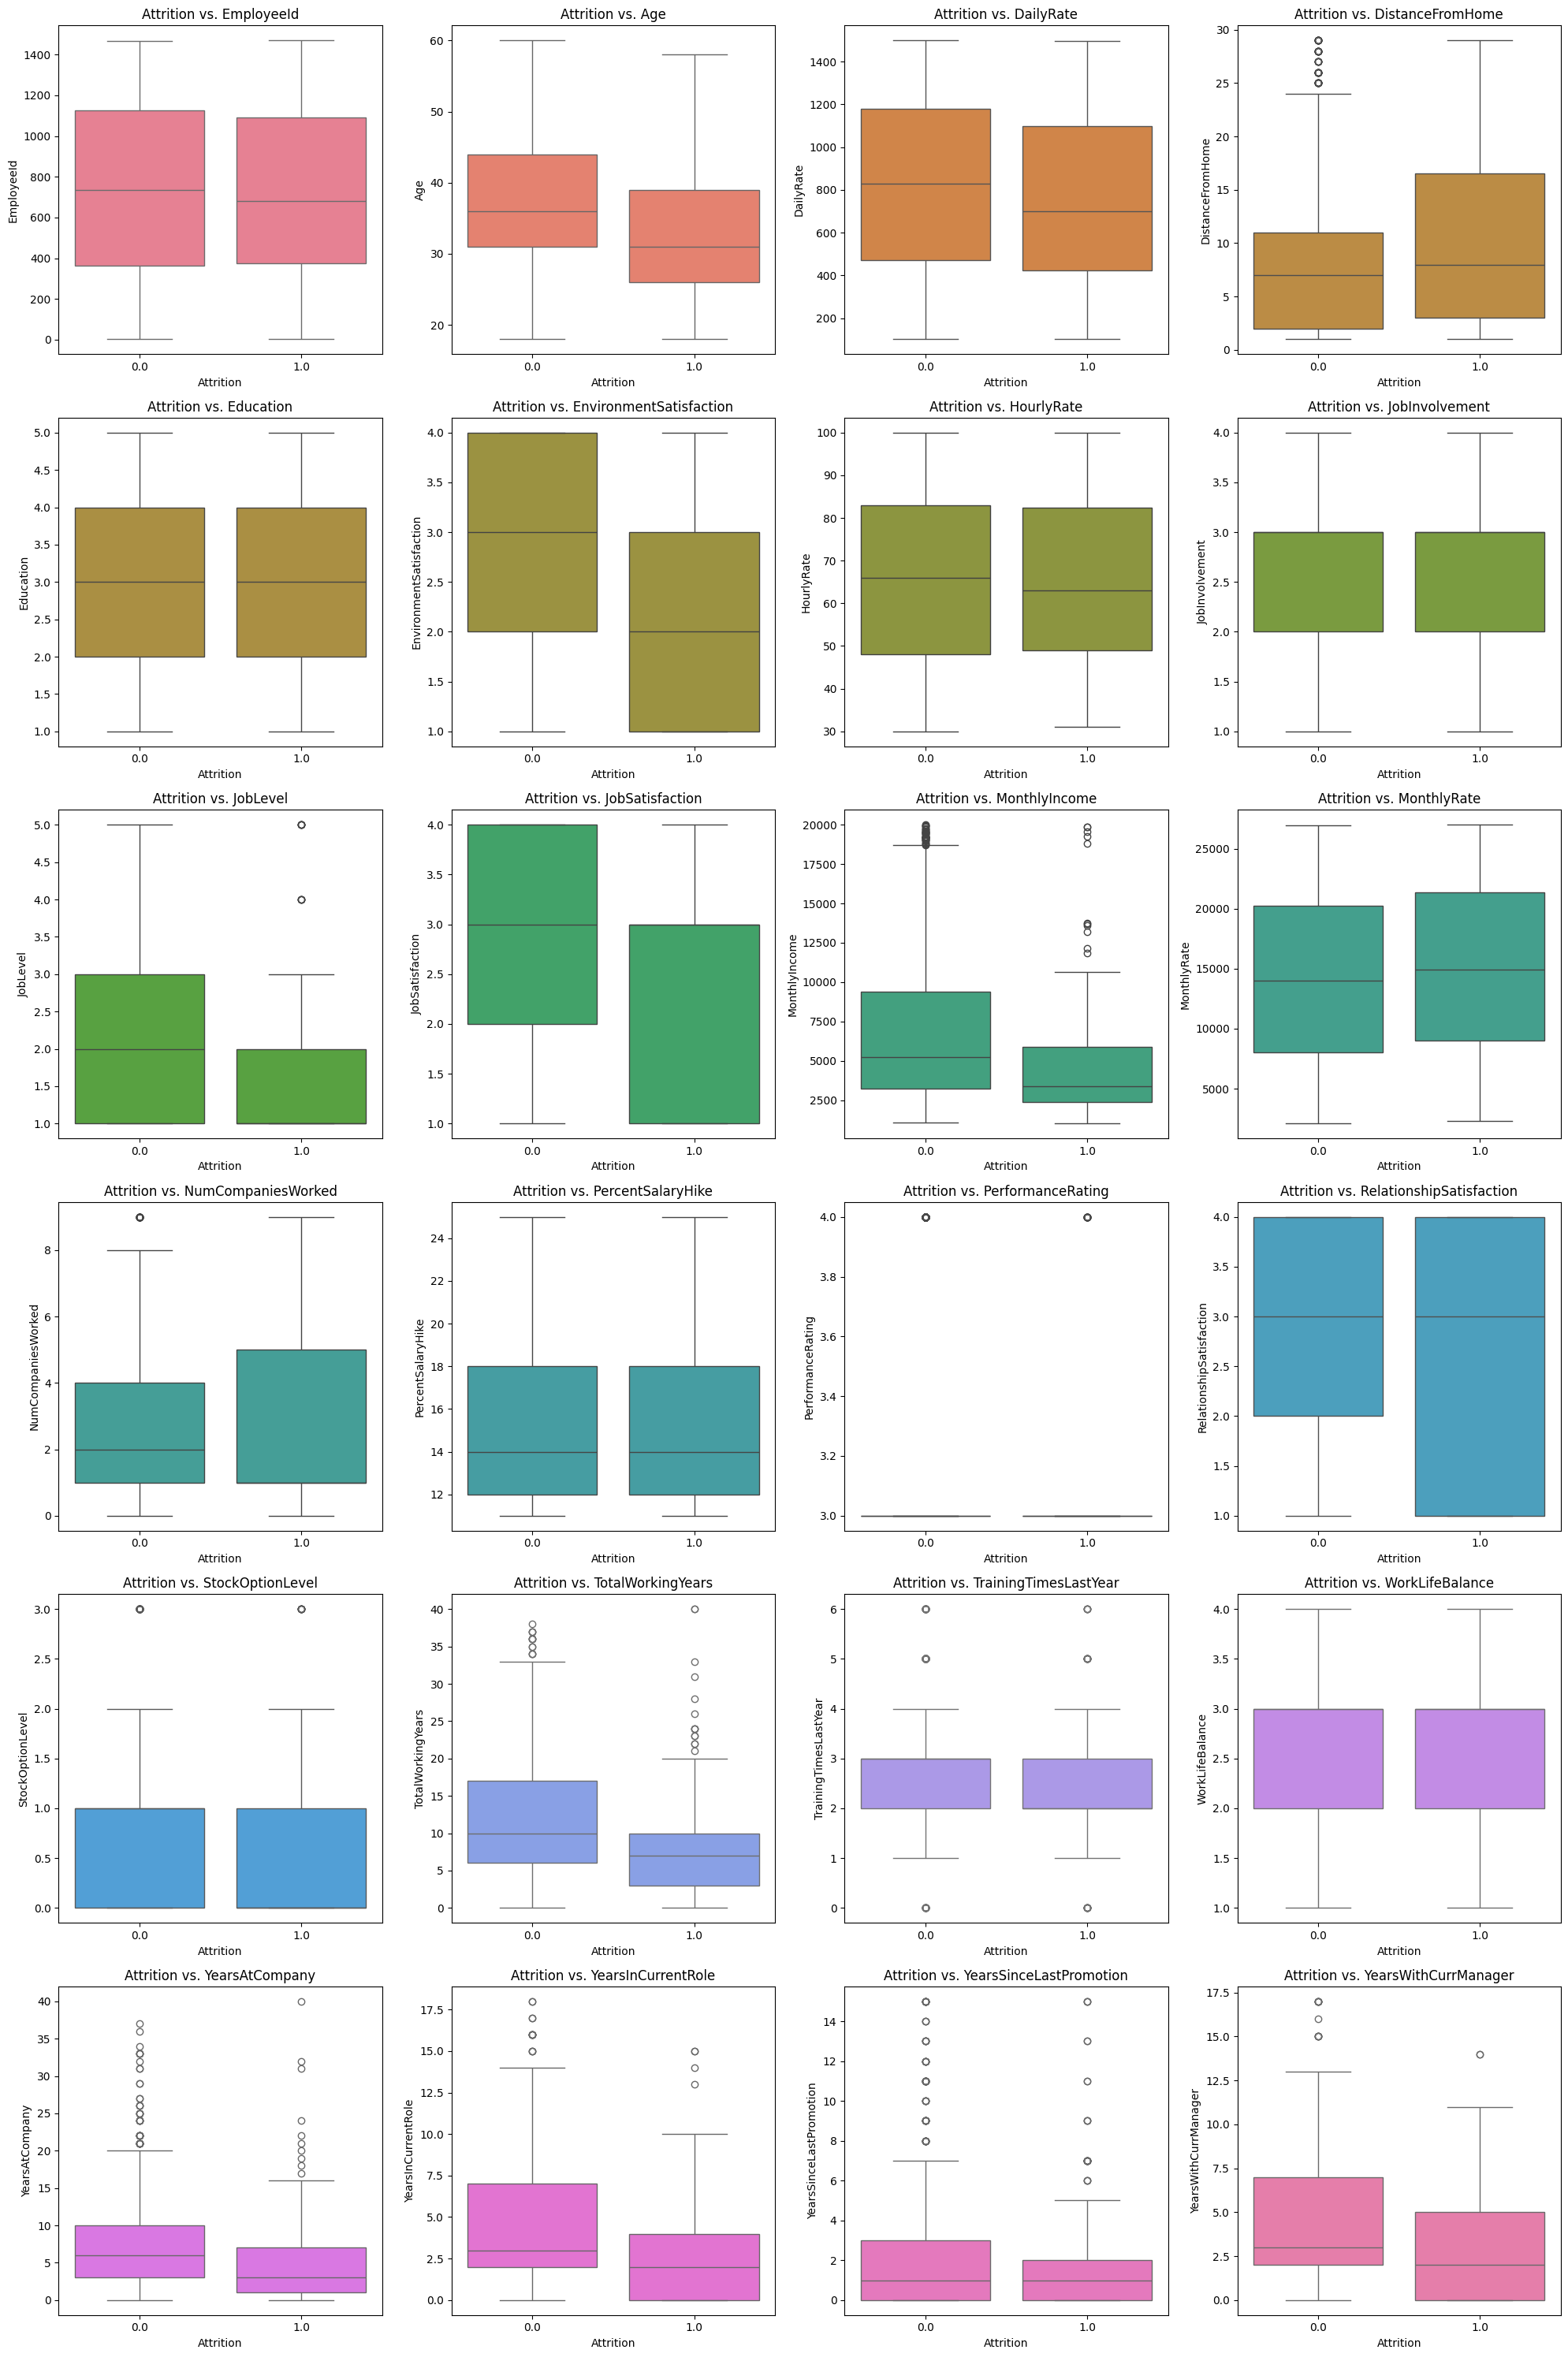

In [14]:
# Pilih kolom numerik kecuali 'Attrition'
numeric_cols = numeric_cols.drop('Attrition')

# Hitung jumlah baris dan kolom untuk subplot
n_features = len(numeric_cols)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Buat subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Ratakan array axes

# Buat palette warna
palette = sns.color_palette("husl", n_features)

# Iterasi melalui fitur numerik
for i, col in enumerate(numeric_cols):
    if i < len(axes):  # Periksa apakah axes ada untuk fitur saat ini
        sns.boxplot(x='Attrition', y=col, data=df, ax=axes[i], color=palette[i])
        axes[i].set_title(f'Attrition vs. {col}')

# Sembunyikan subplot yang tidak digunakan
for i in range(n_features, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [15]:
from google.colab import files
df.to_csv('employees_cleaned.csv', index=False)
files.download('employees_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

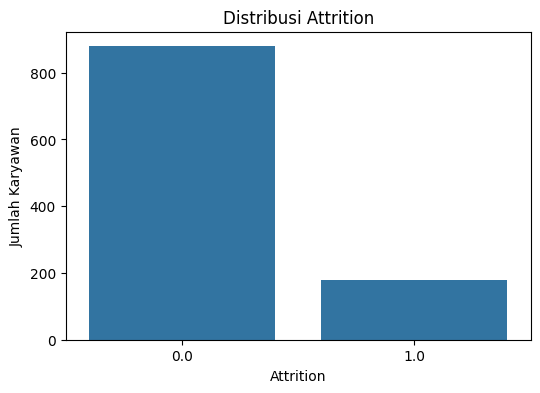

In [16]:
# Visualisasi distribusi Attrition
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition')
plt.title('Distribusi Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jumlah Karyawan')
plt.show()

Visualisasi di atas menunjukkan distribusi Attrition (pengunduran diri) karyawan dalam dataset, dengan:

1. Kategori 0 (Tidak mengundurkan diri)

  Mayoritas karyawan dalam dataset berada dalam kategori ini. Secara visual terlihat bahwa lebih dari 850 karyawan masih aktif bekerja di perusahaan. Hal ini menunjukkan bahwa sebagian besar tenaga kerja tetap bertahan dan tidak meninggalkan perusahaan.

2. Kategori 1 (Mengundurkan diri)

  Hanya sebagian kecil karyawan yang termasuk dalam kategori ini, yaitu sekitar 150 hingga 200 orang. Jumlah ini jauh lebih rendah dibandingkan karyawan yang bertahan.

*Insight* pada visualisasi diagram bar di atas, yaitu mayoritas karyawan tidak mengundurkan diri, karyawan yang mengundurkan diri (1) hanya sekitar 150–200 orang, dan tingkat Attrition secara kasar berkisar antara 15%–20%.


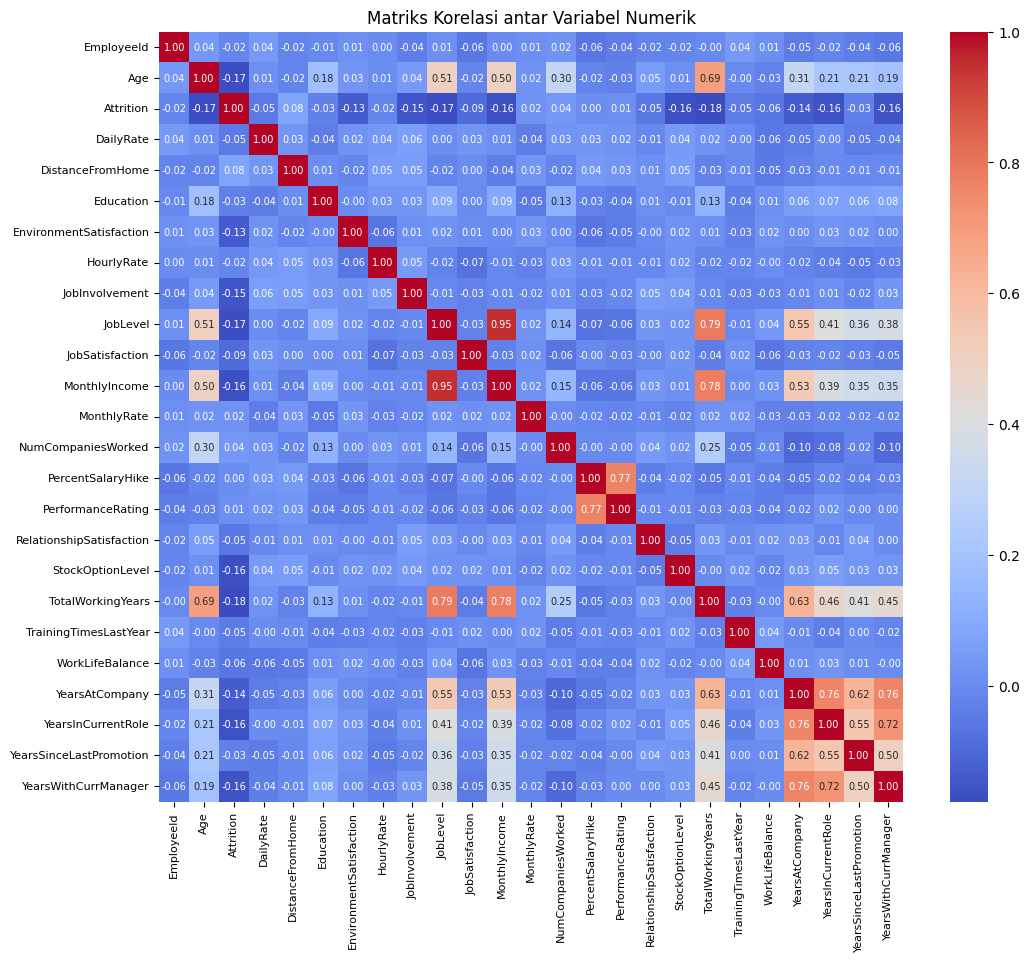

In [17]:
numeric_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols_for_corr].corr()

# heatmap dari matriks korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f",  annot_kws={'size': 7})
plt.title('Matriks Korelasi antar Variabel Numerik')
# Mengatur ukuran label
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Visualisasi di atas merupakan matriks korelasi antar variabel numerik. Korelasi `Attrition` dengan semua variabel numerik berada di bawah 0.08, yang berarti tidak ada variabel dengan korelasi kuat.

In [18]:
attrition_corr = corr_matrix['Attrition'].sort_values(ascending=False)

# 10 fitur dengan korelasi tertinggi
top_10_highest_corr = attrition_corr[1:].head(10)
print("10 Fitur dengan Korelasi Tertinggi dengan Attrition:")
top_10_highest_corr

10 Fitur dengan Korelasi Tertinggi dengan Attrition:


,Attrition
DistanceFromHome,0.078074
NumCompaniesWorked,0.037429
MonthlyRate,0.023299
PerformanceRating,0.007755
PercentSalaryHike,0.004907
HourlyRate,-0.017524
EmployeeId,-0.017912
YearsSinceLastPromotion,-0.031944
Education,-0.032631
TrainingTimesLastYear,-0.047859


In [19]:
# 10 fitur dengan korelasi terendah
top_10_lowest_corr = attrition_corr.tail(10)
print("\n10 Fitur dengan Korelasi Terendah dengan Attrition:")
top_10_lowest_corr


10 Fitur dengan Korelasi Terendah dengan Attrition:


,Attrition
EnvironmentSatisfaction,-0.132848
YearsAtCompany,-0.135134
JobInvolvement,-0.150196
YearsWithCurrManager,-0.155962
YearsInCurrentRole,-0.158757
MonthlyIncome,-0.163600
StockOptionLevel,-0.164228
JobLevel,-0.169201
Age,-0.172067
TotalWorkingYears,-0.177137


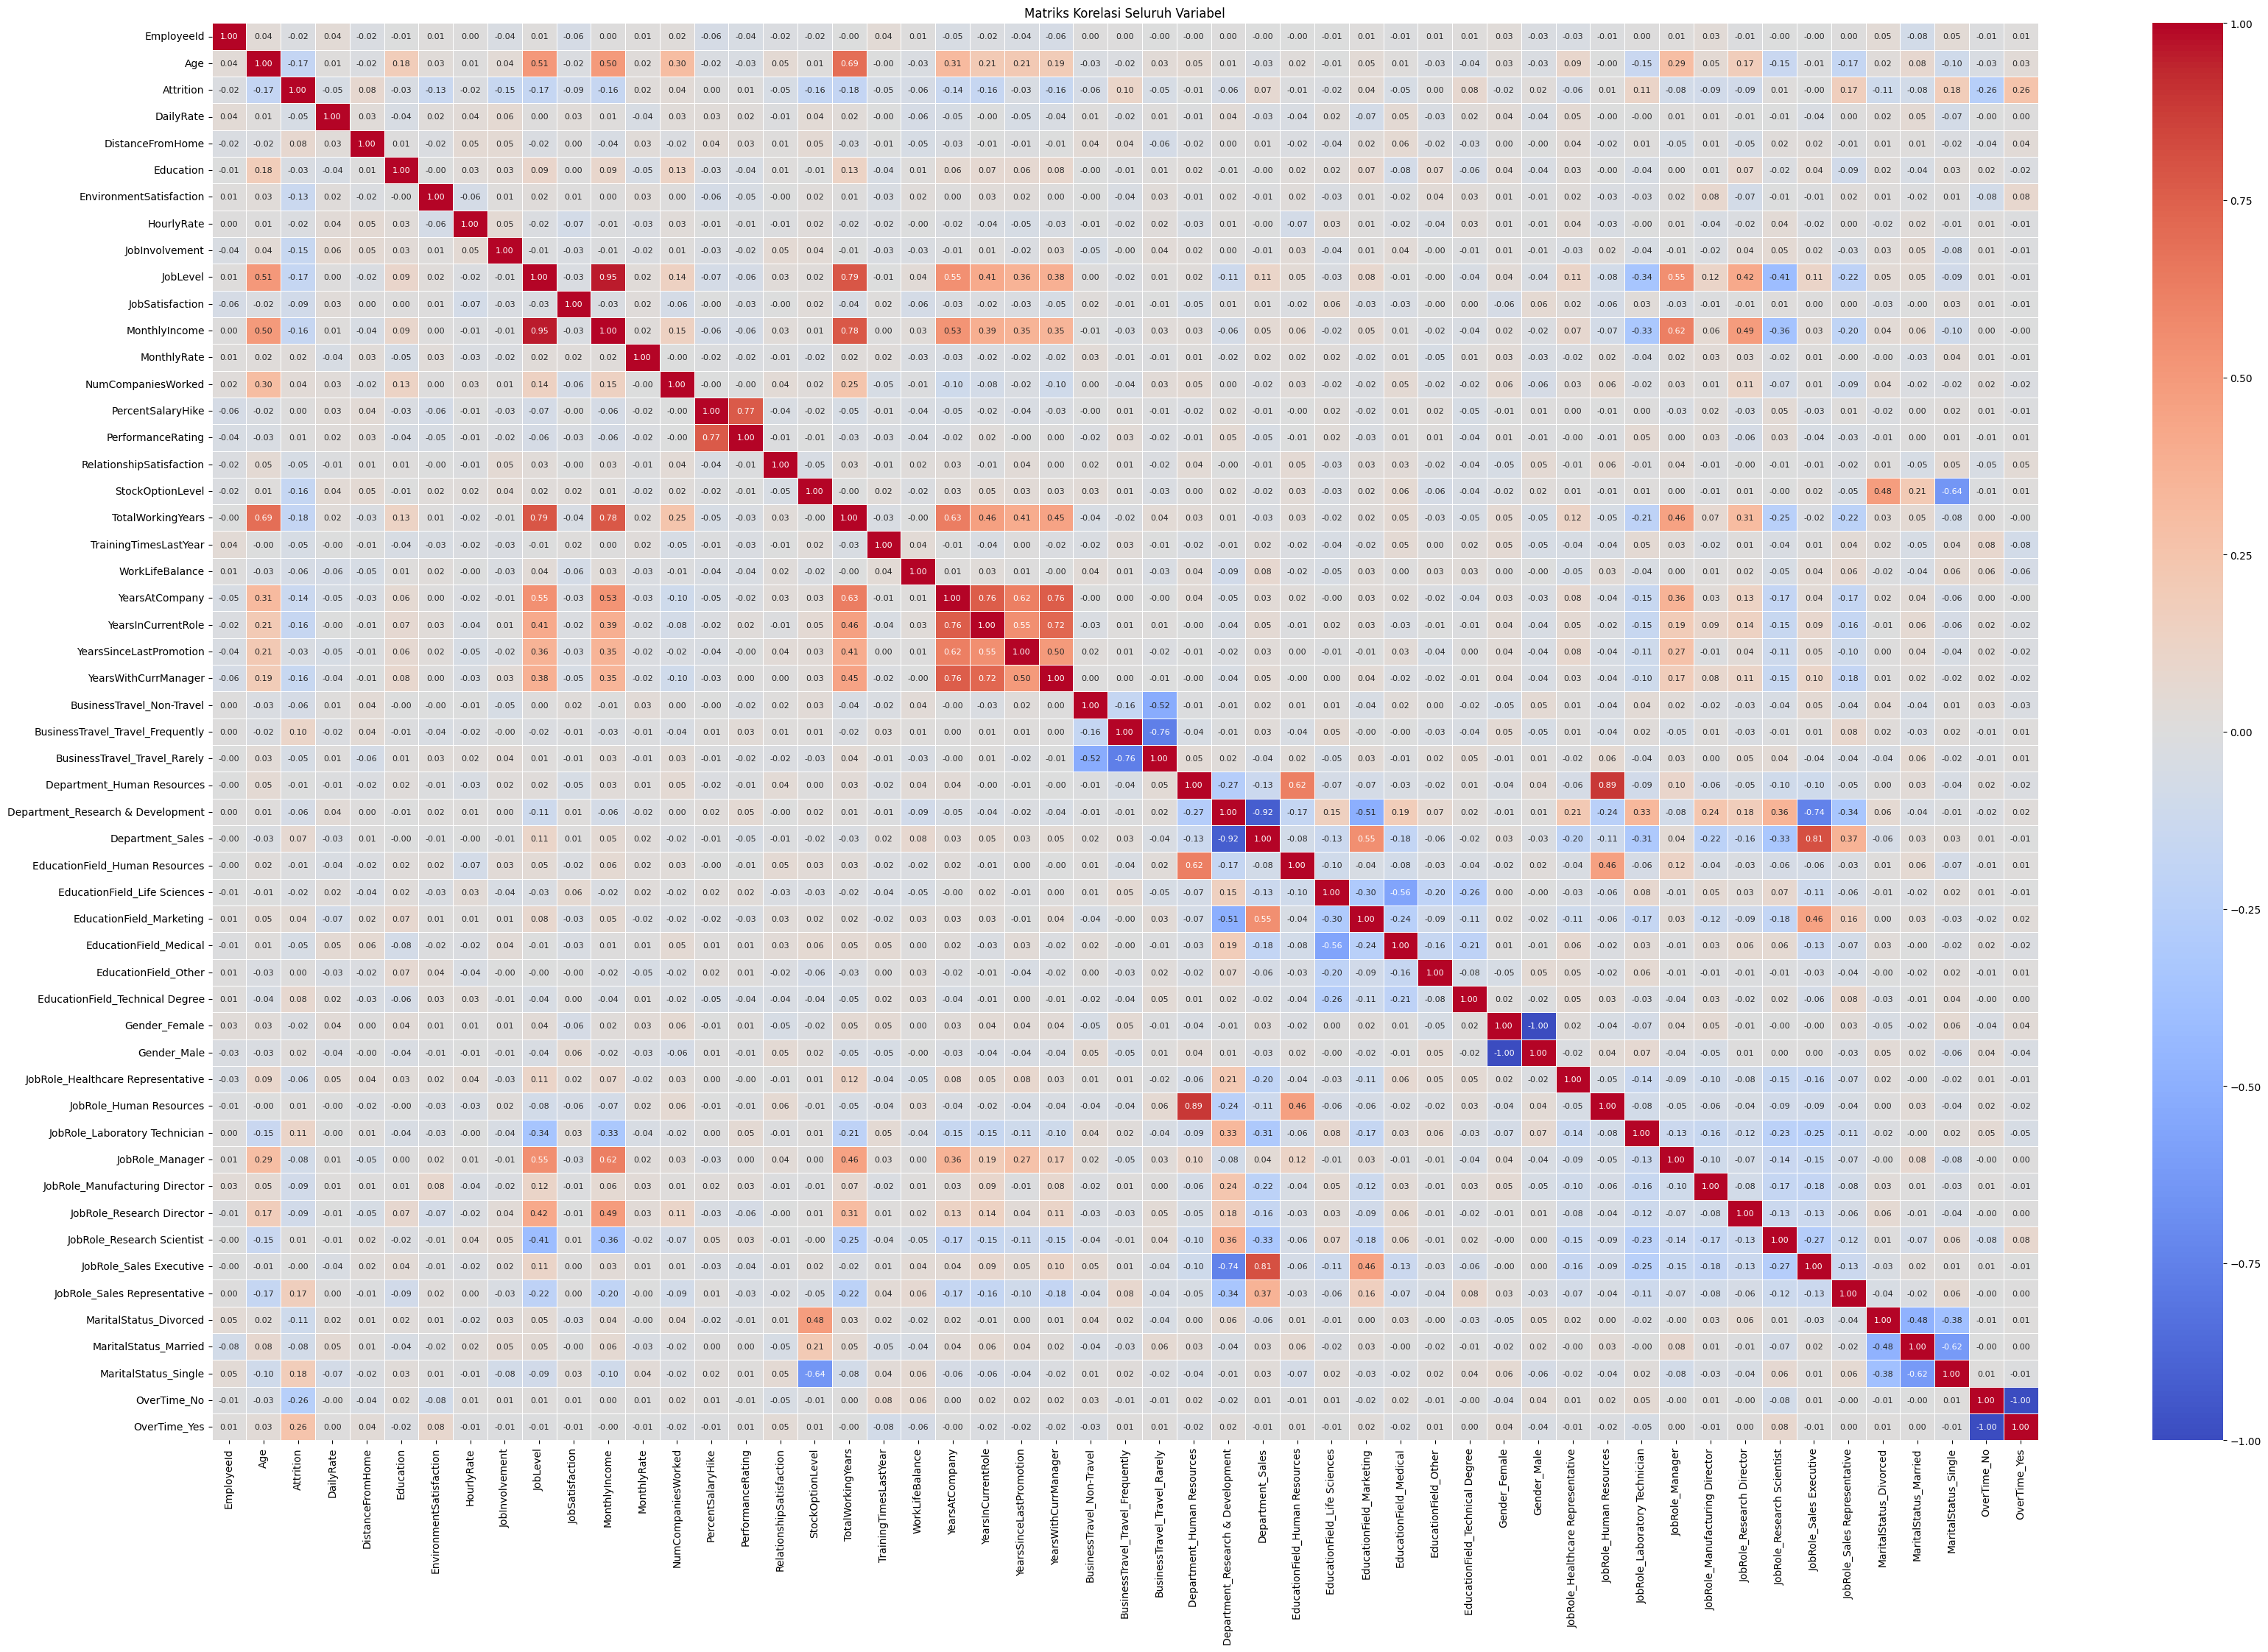

In [20]:
# One-hot encoding fitur kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Matriks korelasi seluruh fitur
correlation_matrix = df_encoded.corr()

# Plot matriks korelasi
plt.figure(figsize=(40, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={'size': 8})
plt.title('Matriks Korelasi Seluruh Variabel')
plt.show()

Visualisasi di atas merupakan matriks korelasi antara semua variabel, baik variabel numerik maupun kategorial yang sudah dilakukan *one hot encoding*. Terdapat beberapa *insight* pada visualisasi di atas, yaitu pasangan fitur `MonthlyIncome` dan `JobLevel`	merupakan pasangan fitur yang memiliki korelasi positif paling tinggi, sebesar 0.95. Korelasi `Attrition` dengan sebagian besar variabel bersifat lemah, yaitu di bawah 0.26.


In [21]:
print(f"Jumlah kolom setelah encoding: {df_encoded.shape[1]}")

Jumlah kolom setelah encoding: 53


In [22]:
# 10 nilai korelasi terbesar (kecuali korelasi dengan dirinya sendiri)
stacked_corr = correlation_matrix.stack()
sorted_corr = stacked_corr.sort_values(ascending=False)
top_10_corr = sorted_corr[sorted_corr < 1].head(20) # 20 teratas karena berpasangan

print("\n10 Pasangan Fitur dengan Korelasi Positif Terbesar:")
top_10_corr


10 Pasangan Fitur dengan Korelasi Positif Terbesar:


,,0
MonthlyIncome,JobLevel,0.953964
JobLevel,MonthlyIncome,0.953964
JobRole_Human Resources,Department_Human Resources,0.885059
Department_Human Resources,JobRole_Human Resources,0.885059
JobRole_Sales Executive,Department_Sales,0.806642
Department_Sales,JobRole_Sales Executive,0.806642
TotalWorkingYears,JobLevel,0.786925
JobLevel,TotalWorkingYears,0.786925
MonthlyIncome,TotalWorkingYears,0.778177
TotalWorkingYears,MonthlyIncome,0.778177


In [23]:
# Pasangan fitur yang berkorelasi dengan Attrition
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
# Menghapus korelasi Attrition dengan dirinya sendiri
attrition_corr = attrition_corr.drop('Attrition')

print("\nPasangan Fitur yang Berelasi dengan Attrition:")
attrition_corr


Pasangan Fitur yang Berelasi dengan Attrition:


,Attrition
OverTime_Yes,0.255856
MaritalStatus_Single,0.184303
JobRole_Sales Representative,0.168200
JobRole_Laboratory Technician,0.113390
BusinessTravel_Travel_Frequently,0.104074
DistanceFromHome,0.078074
EducationField_Technical Degree,0.076868
Department_Sales,0.066083
EducationField_Marketing,0.042300
NumCompaniesWorked,0.037429


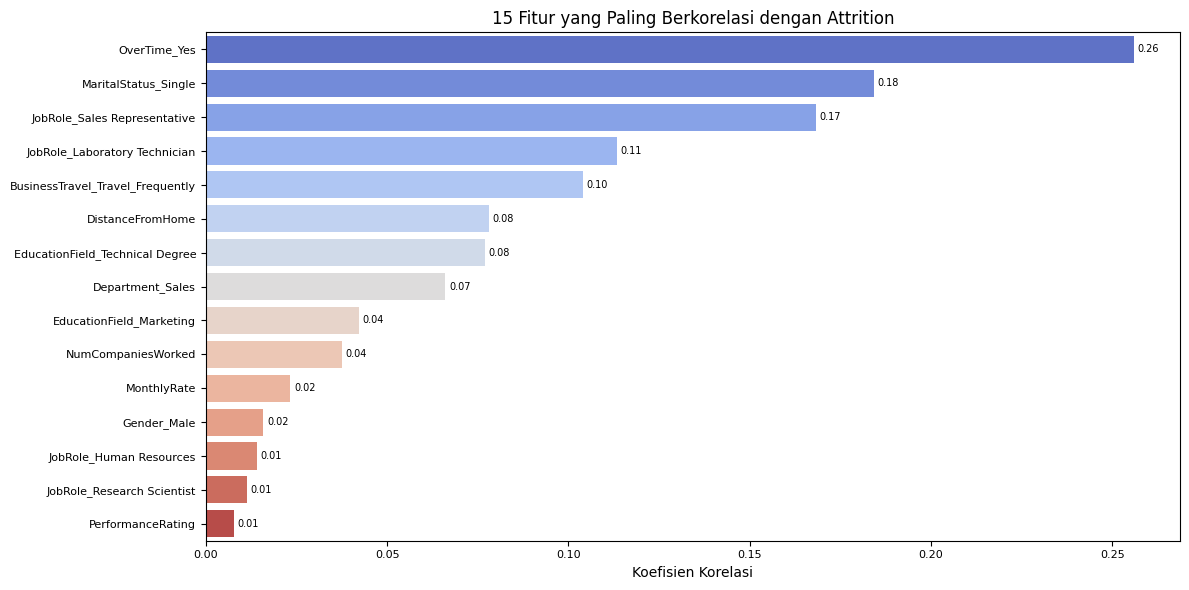

In [24]:
# Plot untuk setiap fitur kategorikal relatif terhadap 'Attrition'
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)

# 15 fitur dengan korelasi tertinggi (kecuali dirinya sendiri)
top_15_attrition = attrition_corr.drop('Attrition').head(15)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=top_15_attrition.values,
    y=top_15_attrition.index,
    hue=top_15_attrition.index,
    palette='coolwarm',
    dodge=False,
    legend=False
)


for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{width:.2f}',
                (x + width + 0.001, y + p.get_height() / 2),
                ha='left', va='center',
                fontsize=7, color='black')

ax.set_ylabel('')
plt.title('15 Fitur yang Paling Berkorelasi dengan Attrition', fontsize=12)
plt.xlabel('Koefisien Korelasi', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat diambil kesimpulan yaitu sebagai berikut.
- Fitur yang paling kuat korelasinya dengan Attrition adalah **OverTime_Yes**.
- Korelasi masih dalam kategori **lemah** karena nilai yang paling tinggi hanya sebesar 0.26.
- Fitur-fitur seperti OverTime, JobRole, MaritalStatus, BusinessTravel, dan DistanceFromHome dapat dijadikan **indikator awal risiko Attrition**.

## Data Preprocessing

In [25]:
# Menghapus kolom yang tidak diperlukan
df_clean = df_encoded.drop(columns=['EmployeeId'])

In [26]:
# Konversi kolom 'Attrition' menjadi int
df_clean['Attrition'] = df_clean['Attrition'].astype(int)

In [27]:
df_clean.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1,37,1,1141,11,2,1,61,1,2,2,...,False,False,False,False,False,False,True,False,True,False
2,51,1,1323,4,4,1,34,3,1,3,...,False,False,True,False,False,False,True,False,False,True
3,42,0,555,26,3,3,77,3,4,2,...,False,False,False,True,False,False,True,False,True,False


In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1058 non-null   int64
 1   Attrition                          1058 non-null   int64
 2   DailyRate                          1058 non-null   int64
 3   DistanceFromHome                   1058 non-null   int64
 4   Education                          1058 non-null   int64
 5   EnvironmentSatisfaction            1058 non-null   int64
 6   HourlyRate                         1058 non-null   int64
 7   JobInvolvement                     1058 non-null   int64
 8   JobLevel                           1058 non-null   int64
 9   JobSatisfaction                    1058 non-null   int64
 10  MonthlyIncome                      1058 non-null   int64
 11  MonthlyRate                        1058 non-null   int64
 12  NumCompaniesWorked       

In [29]:
# Definisikan fitur dan target
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']

# Mengatasi imbalance data dengan SMOTE
print("Distribusi kelas sebelum SMOTE:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nDistribusi kelas setelah SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Standardisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nJumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])
print("Jumlah fitur:", X_train.shape[1])

Distribusi kelas sebelum SMOTE:
Attrition
0    879
1    179
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
Attrition
1    879
0    879
Name: count, dtype: int64

Jumlah data training: 1406
Jumlah data testing: 352
Jumlah fitur: 51


## Modeling

In [31]:
# Menyiapkan dictionary untuk menyimpan hasil evaluasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}

In [32]:
# Melatih dan mengevaluasi setiap model
print("\nTraining dan evaluasi model:")
print("="*50)

for name, model in models.items():
    print(f"\nModel: {name}")
    start_time = time.time()

    # Melatih model
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Menghitung ROC AUC jika model mendukung predict_proba
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Simpan hasil evaluasi
    training_time = time.time() - start_time
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'training_time': training_time,
        'model': model
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Training Time: {training_time:.2f} seconds")


Training dan evaluasi model:

Model: Logistic Regression
Accuracy: 0.9091
Precision: 0.9437
Recall: 0.8678
F1 Score: 0.9042
ROC AUC: 0.9621
Training Time: 0.07 seconds

Model: Random Forest
Accuracy: 0.9318
Precision: 0.9464
Recall: 0.9138
F1 Score: 0.9298
ROC AUC: 0.9712
Training Time: 0.51 seconds

Model: Decision Tree
Accuracy: 0.8267
Precision: 0.8156
Recall: 0.8391
F1 Score: 0.8272
ROC AUC: 0.8268
Training Time: 0.03 seconds

Model: Gradient Boosting
Accuracy: 0.9148
Precision: 0.9337
Recall: 0.8908
F1 Score: 0.9118
ROC AUC: 0.9631
Training Time: 0.66 seconds

Model: XGBoost
Accuracy: 0.9176
Precision: 0.9448
Recall: 0.8851
F1 Score: 0.9139
ROC AUC: 0.9622
Training Time: 0.35 seconds

Model: SVM
Accuracy: 0.9062
Precision: 0.9548
Recall: 0.8506
F1 Score: 0.8997
ROC AUC: 0.9648
Training Time: 0.30 seconds

Model: KNN
Accuracy: 0.9034
Precision: 0.8933
Recall: 0.9138
F1 Score: 0.9034
ROC AUC: 0.9732
Training Time: 0.03 seconds


In [33]:
# Model terbaik berdasarkan F1 Score
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
best_model = results[best_model_name]['model']

print("\n" + "="*50)
print(f"Model terbaik (berdasarkan F1 Score): {best_model_name}")
print(f"F1 Score: {results[best_model_name]['f1_score']:.4f}")
print(f"Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"Precision: {results[best_model_name]['precision']:.4f}")
print(f"Recall: {results[best_model_name]['recall']:.4f}")
if results[best_model_name]['roc_auc'] is not None:
    print(f"ROC AUC: {results[best_model_name]['roc_auc']:.4f}")


Model terbaik (berdasarkan F1 Score): Random Forest
F1 Score: 0.9298
Accuracy: 0.9318
Precision: 0.9464
Recall: 0.9138
ROC AUC: 0.9712


## Evaluation

In [34]:
# Perbandingan model
comparison_table = pd.DataFrame({
    'Accuracy': [results[model]['accuracy'] for model in results],
    'Precision': [results[model]['precision'] for model in results],
    'Recall': [results[model]['recall'] for model in results],
    'F1 Score': [results[model]['f1_score'] for model in results],
    'ROC AUC': [results[model]['roc_auc'] if results[model]['roc_auc'] is not None else float('nan') for model in results],
    'Training Time (s)': [results[model]['training_time'] for model in results]
}, index=results.keys())

print("\nPerbandingan Model:")
comparison_table.sort_values(by='F1 Score', ascending=False)


Perbandingan Model:


,Accuracy,Precision,Recall,F1 Score,ROC AUC,Training Time (s)
Random Forest,0.931818,0.946429,0.913793,0.929825,0.971232,0.505596
XGBoost,0.917614,0.944785,0.885057,0.913947,0.962192,0.346697
Gradient Boosting,0.914773,0.933735,0.890805,0.911765,0.963063,0.658088
Logistic Regression,0.909091,0.943750,0.867816,0.904192,0.962095,0.065673
KNN,0.903409,0.893258,0.913793,0.903409,0.973185,0.032683
SVM,0.906250,0.954839,0.850575,0.899696,0.964839,0.295531
Decision Tree,0.826705,0.815642,0.839080,0.827195,0.826844,0.030286


<Figure size 1200x1000 with 0 Axes>

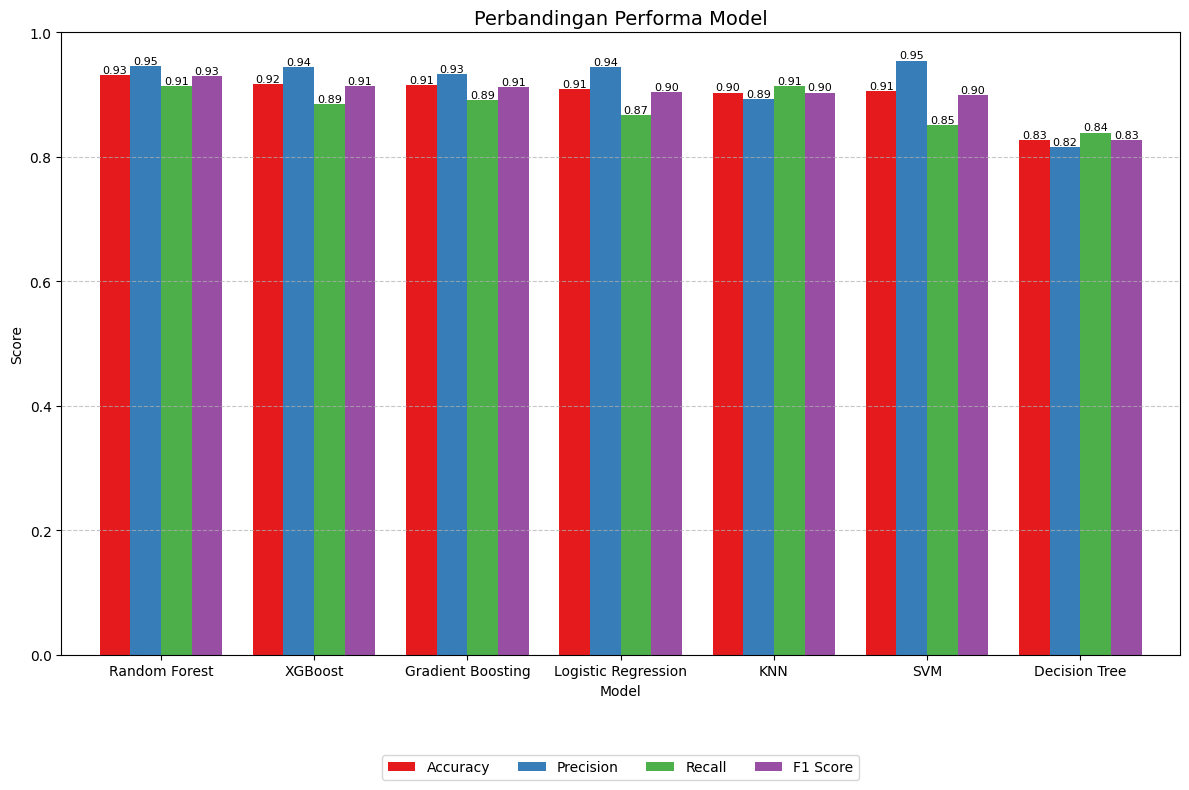

In [35]:
# Visualisasi hasil evaluasi model
plt.figure(figsize=(12, 10))

# Plot Accuracy, Precision, Recall, F1 Score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
comparison_subset = comparison_table[metrics].sort_values(by='F1 Score', ascending=False)

colors = sns.color_palette('Set1', len(comparison_subset))

ax = comparison_subset.plot(kind='bar', figsize=(12, 8), width=0.8, color=colors)
plt.title('Perbandingan Performa Model', fontsize=14)
plt.ylabel('Score', fontsize=10)
plt.xlabel('Model', fontsize=10)
plt.xticks(rotation=0, ha='center')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

# Menambahkan nilai di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=8)

plt.tight_layout()
plt.show()

In [36]:
comparison_table['Average Score'] = comparison_table[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1)
print("\nRata-rata Score Tiap Model:")
print(comparison_table.sort_values(by='Average Score', ascending=False)['Average Score'])


Rata-rata Score Tiap Model:
Random Forest          0.930466
XGBoost                0.915351
Gradient Boosting      0.912769
Logistic Regression    0.906212
KNN                    0.903467
SVM                    0.902840
Decision Tree          0.827156
Name: Average Score, dtype: float64


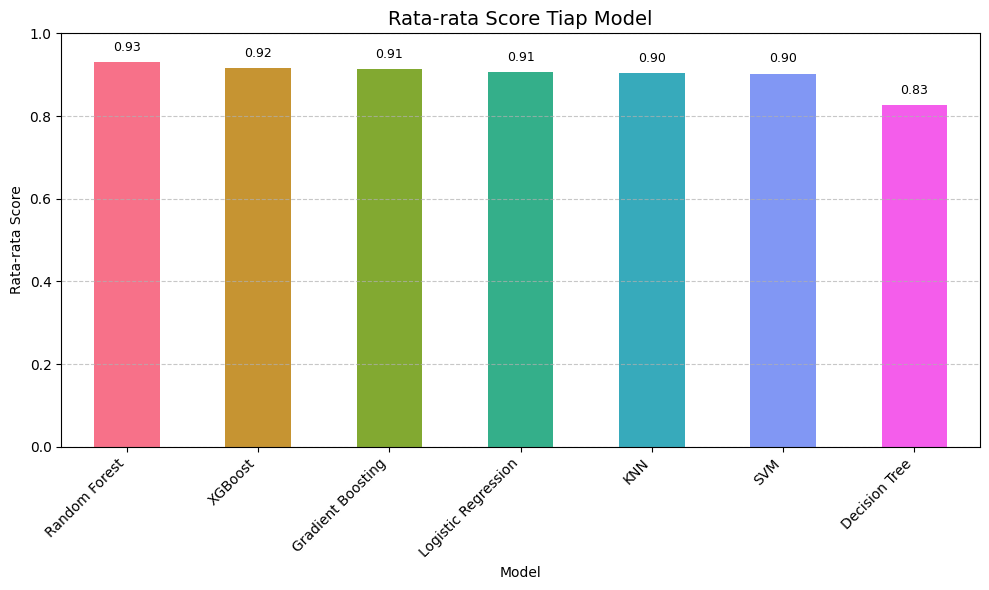

In [37]:
plt.figure(figsize=(10, 6))
comparison_table.sort_values(by='Average Score', ascending=False)['Average Score'].plot(kind='bar', color=sns.color_palette('husl', len(comparison_table)))
plt.title('Rata-rata Score Tiap Model', fontsize=14)
plt.ylabel('Rata-rata Score', fontsize=10)
plt.xlabel('Model', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(comparison_table.sort_values(by='Average Score', ascending=False)['Average Score']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa Random Forest memiliki poin nilai tertinggi yaitu sebesar 0.93.

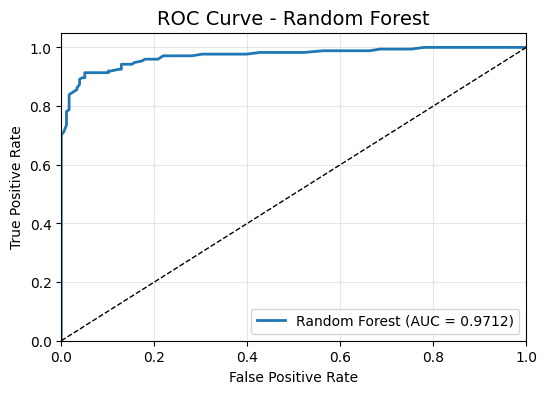

In [38]:
# Visualisasi ROC Curve untuk model terbaik
plt.figure(figsize=(6, 4))

# Mendapatkan model terbaik
best_model = results[best_model_name]['model']

# Memprediksi probabilitas kelas positif
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Menghitung false positive rate, true positive rate, dan threshold
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label=f'{best_model_name} (AUC = {results[best_model_name]["roc_auc"]:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title(f'ROC Curve - {best_model_name}', fontsize=14)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

Berdasarkan visualisasi di atas, model Random Forest merupakan model terbaik untuk kasus prediksi Attrition karyawan, berdasarkan kurva ROC yang sangat baik dan nilai AUC = 0.9712, yang menunjukkan bahwa model ini dapat mengklasifikasikan dengan sangat baik antara karyawan yang akan keluar dan yang akan tetap tinggal. Kurva ROC model Random Forest berada jauh di atas garis diagonal (*baseline*), yang mengindikasikan bahwa model memiliki kemampuan klasifikasi yang sangat baik dalam membedakan antara kelas positif dan kelas negatif. ROC Curve menunjukkan bahwa untuk mayoritas titik *threshold*, model menjaga tingkat *false positive* yang rendah sambil tetap mempertahankan *true positive rate* yang tinggi. Dengan TPR yang tinggi dan FPR yang rendah, Random Forest cocok untuk diterapkan pada kasus di mana:
1. Kelas minoritas (seperti karyawan keluar/Attrition) penting untuk dikenali.
2. Kesalahan klasifikasi (*false negative* atau *false positive*) memiliki konsekuensi besar.

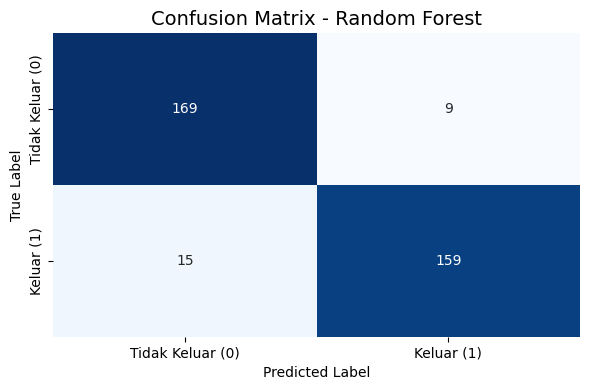

In [39]:
# Confusion matrix untuk model terbaik
y_pred = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14)
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
plt.xticks([0.5, 1.5], ['Tidak Keluar (0)', 'Keluar (1)'])
plt.yticks([0.5, 1.5], ['Tidak Keluar (0)', 'Keluar (1)'])
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, dapat diambil kesimpulan yaitu sebagai berikut.
1. Model Random Forest memiliki performa klasifikasi yang sangat baik, dengan jumlah prediksi benar (TP + TN) yang sangat tinggi.
2. Kesalahan prediksi (FP dan FN) tergolong kecil, menandakan model stabil dan tidak bias terhadap salah satu kelas.
3. Cocok untuk digunakan pada kasus nyata dalam sistem HR untuk mengantisipasi potensi pengunduran diri karyawan secara proaktif.

In [40]:
# Feature importance
importances = models['Random Forest'].feature_importances_

In [41]:
feature_names = X_train.columns.tolist()

feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

<ipython-input-42-83dd97b79cbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


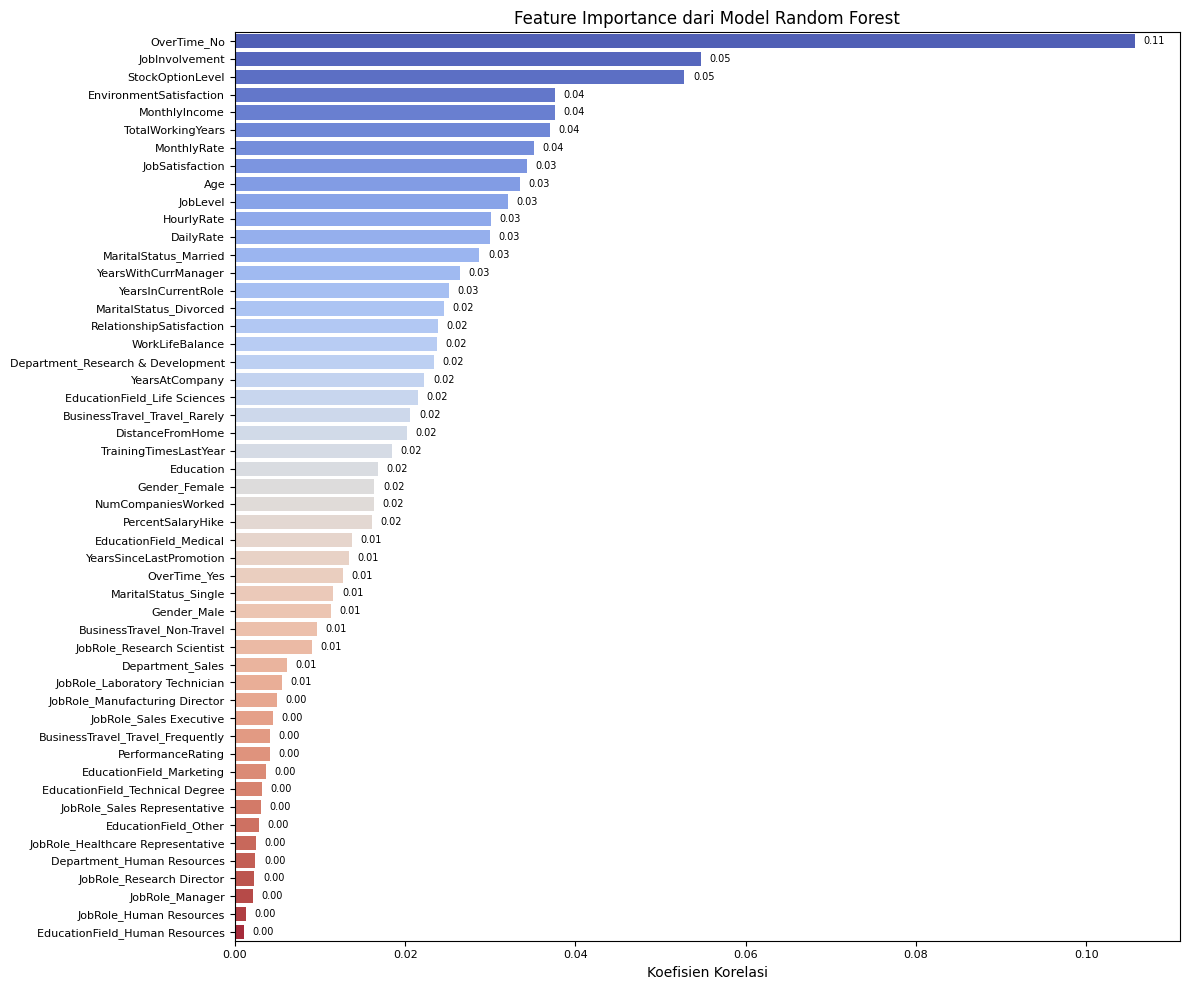

In [42]:
# Plotting
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_importance_df,
    palette='coolwarm',
    dodge=False,
    legend=False
)


for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{width:.2f}',
                (x + width + 0.001, y + p.get_height() / 2),
                ha='left', va='center',
                fontsize=7, color='black')

ax.set_ylabel('')
plt.title('Feature Importance dari Model Random Forest', fontsize=12)
plt.xlabel('Koefisien Korelasi', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [43]:
# Classification Report untuk model terbaik
print("Classification Report untuk model terbaik:")
print(classification_report(y_test, y_pred))

Classification Report untuk model terbaik:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       178
           1       0.95      0.91      0.93       174

    accuracy                           0.93       352
   macro avg       0.93      0.93      0.93       352
weighted avg       0.93      0.93      0.93       352



In [44]:
print("KESIMPULAN:")
print(f"Model terbaik untuk prediksi attrition karyawan adalah {best_model_name} dengan F1 Score {results[best_model_name]['f1_score']:.4f}.")
print("Berdasarkan analisis feature importance, faktor-faktor yang paling mempengaruhi attrition karyawan adalah:")
if best_model_name in ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'SVM', 'KNN']:
    for i, feature in enumerate(feat_importance_df['Feature'].head(5)):
        print(f"{i+1}. {feature}")

KESIMPULAN:
Model terbaik untuk prediksi attrition karyawan adalah Random Forest dengan F1 Score 0.9298.
Berdasarkan analisis feature importance, faktor-faktor yang paling mempengaruhi attrition karyawan adalah:
1. OverTime_No
2. JobInvolvement
3. StockOptionLevel
4. EnvironmentSatisfaction
5. MonthlyIncome


In [71]:
import joblib
from google.colab import files

# Download model terbaik
joblib.dump(best_model, f'{best_model_name}_model.pkl')
files.download(f'{best_model_name}_model.pkl')

# Download file scaler
joblib.dump(scaler, 'scaler.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion

Berdasarkan hasil analisis dan pemodelan yang telah dilakukan pada dataset karyawan perusahaan Jaya Jaya Maju, berikut adalah kesimpulan dari problem statement yang telah diidentifikasi:

- **Tingginya tingkat attrition rate karyawan yang melebihi 10%**

  Tingkat attrition yang melebihi 10% menjadi perhatian serius bagi perusahaan. Model Random Forest yang dikembangkan telah berhasil mengidentifikasi faktor-faktor kunci yang berkontribusi terhadap tingginya angka attrition ini. Dengan memahami faktor-faktor ini, perusahaan dapat mengambil langkah-langkah proaktif untuk menekan angka attrition. Model mengidentifikasi bahwa lima faktor teratas yang berkontribusi terhadap attrition tinggi meliputi:

    - OverTime (lembur berlebihan)
    - Keterlibatan dalam pekerjaan (Job Involvement)
    - Level opsi saham (Stock Option Level)
    - Kepuasan terhadap lingkungan kerja (Environment Satisfaction)
    - Pendapatan bulanan (Monthly Income)

- **Faktor-faktor yang Mempengaruhi Tingginya Tingkat Attrition**

  Model Random Forest berhasil mengidentifikasi faktor-faktor penyebab attrition secara kuantitatif. Berikut faktor teridentifikasi sebagai faktor yang mempengaruhi tingkat attrition berdasarkan feature importance:
  - OverTime_No (0.11)
  - JobInvolvement (0.05)
  - StockOptionLevel (0.05)
  - EnvironmentSatisfaction (0.04)
  - MonthlyIncome (0.04)
  - TotalWorkingYears (0.04)
  - MonthlyRate (0.04)

- **Cara Memprediksi Kecenderungan Karyawan untuk Meninggalkan Perusahaan**

  Dengan dikembangkannya model Random Forest yang memiliki F1 Score 0.9298, perusahaan kini memiliki sistem prediksi attrition. Model ini dapat digunakan untuk mengidentifikasi karyawan yang berpotensi tinggi untuk attrition berdasarkan karakteristik dan data.


- **Cara Memvisualisasikan Data untuk Wawasan yang Lebih Baik**

  Cara memvisualisasikan data secara efektif dan memberikan wawasan yang actionable kepada departemen HR yaitu dengan membuat dashboard monitoring attrition agar dapat mengidentifikasi departemen atau kelompok karyawan yang berisiko tinggi, memahami faktor pendorong utama attrition, merancang intervensi yang tepat sasaran, dan mengukur efektivitas program retensi karyawan dari waktu ke waktu. Dashboard ini dapat dibuat menggunakan tools seperti Metabase, Streamlit, Tableau, Power BI, atau bahkan kombinasi dari Matplotlib dan Seaborn di Python yang kemudian diintegrasikan ke dalam aplikasi web sederhana.

## Action Items

Berdasarkan hasil analisis dan pemodelan, berikut adalah rekomendasi *action items* untuk HR dan manajemen:
1. OverTime
    - Kaji ulang kebijakan lembur.
    - Distribusi beban kerja yang merata.
    - Implementasi *work life balance*.

2. Job Involvement
    - Implementasikan program mentoring dan pemberdayaan karyawan.
    - Adakan aktivitas *team building* secara berkala.
    - Berikan proyek yang lebih menantang dan bermakna sesuai minat karyawan.
    - Lakukan survei keterlibatan secara berkala.
    - Berikan pengakuan dan penghargaan untuk kontribusi karyawan.

3. Stock Option
    - Evaluasi kebijakan opsi saham.
    - Tawarkan program kepemilikan saham kepada karyawan potensial.
    - Jadikan *stock option* sebagai insentif jangka panjang untuk retensi.

4. Environment Satisfaction
    - Survei kepuasan lingkungan kerja.
    - Tingkatkan fasilitas dan kenyamanan kerja.
    - Ciptakan budaya kerja positif dan kolaboratif.

5. Monthly Income
    - Tinjau dan evaluasi struktur gaji dan tunjangan.
    - Implementasi program apresiasi dan penghargaan non-finansial untuk mengakui kinerja baik karyawan.


Dengan mengimplementasikan *action items* ini secara sistematis dan terukur, Perusahaan Jaya Jaya Maju dapat mengurangi tingkat Attrition secara signifikan.

In [ ]:
pip freeze > requirements.txt